In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd
import re
from pickle import dump, load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [2]:
reviews = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')
print(reviews.shape)
reviews.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
product_distribution = reviews['ProductId'].value_counts().reset_index(name='Count')

reviews = reviews.dropna()
columns_to_drop = ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']
reviews = reviews.drop(columns=columns_to_drop)

reviews = reviews.reset_index(drop=True)

print(reviews.shape)
reviews.head()

(568401, 2)


,Summary,Text
0,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"""Delight"" says it all",This is a confection that has been around a fe...
3,Cough Medicine,If you are looking for the secret ingredient i...
4,Great taffy,Great taffy at a great price. There was a wid...


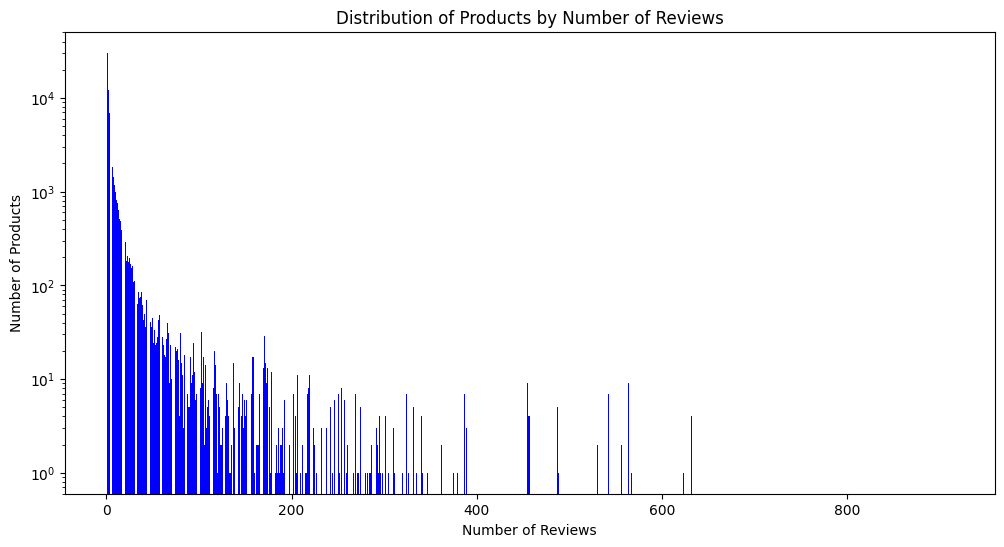

In [4]:
import matplotlib.pyplot as plt
from collections import defaultdict

num_reviews = defaultdict(int)

for index, row in product_distribution.iterrows():
    product_id = row['ProductId']
    count = row['Count']
    num_reviews[count] += 1

num_reviews = {k: v for k, v in sorted(num_reviews.items(), key=lambda item: item[1], reverse=True)}

plt.figure(figsize=(12, 6))
plt.bar(num_reviews.keys(), num_reviews.values(), color='blue')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Number of Reviews')
plt.yscale('log')
plt.show()

In [5]:
contractions_dict = {"ain't": 'am not', "aren't": 'are not', "can't": 'cannot', "can't've": 'cannot have', "cuz": 'because', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "didn't": 'did not', "doesn't": 'does not', "don't": 'do not', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he'd": 'he would', "he'd've": 'he would have', "he'll": 'he will', "he'll've": 'he will have', "he's": 'he is', "how'd": 'how did', "how'd'y": 'how do you', "how'll": 'how will', "how's": 'how is', "I'd": 'I would', "I'd've": 'I would have', "I'll": 'I will', "I'll've": 'I will have', "I'm": 'I am', "I've": 'I have', "isn't": 'is not', "it'd": 'it would', "it'd've": 'it would have', "it'll": 'it will', "it'll've": 'it will have', "it's": 'it is', "let's": 'let us', "ma'am": 'madam', "mayn't": 'may not', "might've": 'might have', "mightn't": 'might not', "mightn't've": 'might not have', "must've": 'must have', "mustn't": 'must not', "mustn't've": 'must not have', "needn't": 'need not', "needn't've": 'need not have', "o'clock": 'of the clock', "oughtn't": 'ought not', "oughtn't've": 'ought not have', "shan't": 'shall not', "sha'n't": 'shall not', "shan't've": 'shall not have', "she'd": 'she would', "she'd've": 'she would have', "she'll": 'she will', "she'll've": 'she will have', "she's": 'she is', "should've": 'should have', "shouldn't": 'should not', "shouldn't've": 'should not have', "so've": 'so have', "so's": 'so as', "that'd": 'that would', "that'd've": 'that would have', "that's": 'that is', "there'd": 'there had', "there'd've": 'there would have', "there's": 'there is', "they'd": 'they would', "they'd've": 'they would have', "they'll": 'they will', "they'll've": 'they will have', "they're": 'they are', "they've": 'they have', "to've": 'to have', "wasn't": 'was not', "we'd": 'we would', "we'd've": 'we would have', "we'll": 'we will', "we'll've": 'we will have', "we're": 'we are', "we've": 'we have', "weren't": 'were not', "what'll": 'what will', "what'll've": 'what will have', "what're": 'what are', "what's": 'what is', "what've": 'what have', "when's": 'when is', "when've": 'when have', "where'd": 'where did', "where's": 'where is', "where've": 'where have', "who'll": 'who will', "who'll've": 'who will have', "who's": 'who is', "who've": 'who have', "why's": 'why is', "why've": 'why have', "will've": 'will have', "won't": 'will not', "won't've": 'will not have', "would've": 'would have', "wouldn't": 'would not', "wouldn't've": 'would not have', "y'all": 'you all', "y'all'd": 'you all would', "y'all'd've": 'you all would have', "y'all're": 'you all are', "y'all've": 'you all have', "you'd": 'you would', "you'd've": 'you would have', "you'll": 'you will', "you'll've": 'you will have', "you're": 'you are', "you've": 'you have', "i'd": 'i would', "i'd've": 'i would have', "i'll": 'i will', "i'll've": 'i will have', "i'm": 'i am', "i've": 'i have', "this's": 'this is', "here's": 'here is', "ya'll": 'you all', 'gonna': 'going to', 'gotta': 'got to', 'wanna': 'want to', 'shoulda': 'should have', 'coulda': 'could have', 'woulda': 'would have', 'mighta': 'might have', 'musta': 'must have', 'oughta': 'ought to', 'dunno': 'do not know', 'kinda': 'kind of', 'sorta': 'sort of', 'gotcha': 'got you', 'gimme': 'give me', 'lemme': 'let me', 'wassup': 'what is up', "c'mon": 'come on', 'whatcha': 'what are you', 'ya': 'you', 'hafta': 'have to', 'shouldna': 'should not have', 'couldna': 'could not have', 'wouldna': 'would not have', 'mightna': 'might not have', 'mustna': 'must not have', 'oughtna': 'ought not to have', "amn't": 'am not'}

In [6]:
def replace_contractions(review):
    for contraction, expanded_form in contractions_dict.items():
        review = re.sub(r'\b' + re.escape(contraction) + r'\b', expanded_form, review, flags=re.IGNORECASE)

    review = re.sub(' +', ' ', review)

    return review

original_review = "I can't wassup cuz believe I haven't tried it yet. It's gonna be amazing!"
cleaned_review = replace_contractions(original_review)
print("Original Review:", original_review)
print("Cleaned Review:", cleaned_review)

Original Review: I can't wassup cuz believe I haven't tried it yet. It's gonna be amazing!
Cleaned Review: I cannot what is up because believe I have not tried it yet. it is going to be amazing!


In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def clean_review(review):
    review = review.lower()
    review = replace_contractions(review)
    review = re.sub(r'https?:\/\/.*[\r\n]*', '', review, flags=re.MULTILINE)
    review = re.sub(r'\<a href', ' ', review)
    review = re.sub(r'&amp;', '', review) 
    review = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', review)
    review = re.sub(r'<br />', ' ', review)
    review = re.sub(r'\'', ' ', review)
    
    words = word_tokenize(review)
    filtered_words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]
    cleaned_review = ' '.join(filtered_words)

    return cleaned_review
    
original_review = "This is a sample review with some common words like 'the', 'and', and 'is'."
review_without_stopwords = clean_review(original_review)
print("Original Review:", original_review)
print("Review without Stopwords:", review_without_stopwords)

Original Review: This is a sample review with some common words like 'the', 'and', and 'is'.
Review without Stopwords: sample review common words like


In [8]:
reviews

,Summary,Text
0,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"""Delight"" says it all",This is a confection that has been around a fe...
3,Cough Medicine,If you are looking for the secret ingredient i...
4,Great taffy,Great taffy at a great price. There was a wid...
...,...,...
568396,Will not do without,Great for sesame chicken..this is a good if no...
568397,disappointed,I'm disappointed with the flavor. The chocolat...
568398,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568399,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [9]:
cleaned_summary = []
i = 0
for t in reviews['Summary']:
    i += 1
    cleaned_summary.append(clean_review(t))

In [10]:
cleaned_text = []
for t in reviews['Text']:
    cleaned_text.append(clean_review(t))

In [11]:
reviews['cleaned_text']=cleaned_text
reviews['cleaned_summary']=cleaned_summary

In [12]:
reviews.to_csv('your_file.csv', index=False)

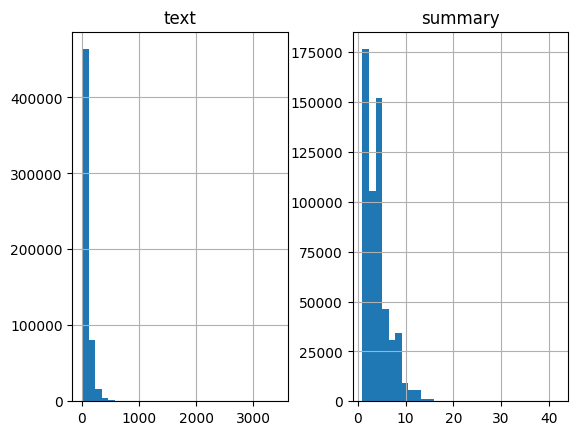

In [13]:
text_word_count = []
summary_word_count = []

for i in reviews['Text']:
      text_word_count.append(len(i.split()))

for i in reviews['Summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()